# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplleaflet
import os
import exploration as ex

from numpy.random import seed
from tensorflow import set_random_seed

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

from pandas.plotting import scatter_matrix
plt.style.use('seaborn-notebook')

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Using TensorFlow backend.


In [2]:
datadir="./data/"
filelist=os.listdir(datadir)

This function loads all journey files and generates summary statistics.

In [3]:
def check_all():
    stats_df=pd.DataFrame()
    avg_stats_df=pd.DataFrame()
    i=1
    for files in filelist:
        print('reading file ' + str(i) + ' '+ files)
        i+=1
        df, stats, avg_stats = ex.df(datadir, files)   
        x=pd.DataFrame([stats], columns=stats.keys())
        stats_df=stats_df.append(x)
        
        y=pd.DataFrame([avg_stats], columns=avg_stats.keys())
        avg_stats_df=avg_stats_df.append(y)
        
    stats_df=stats_df.reset_index().drop(columns='index')
    avg_stats_df=avg_stats_df.reset_index().drop(columns='index')
    
    #scatter_matrix(avg_stats_df)
    #scatter_matrix(stats_df)
    return stats_df, avg_stats_df

## Comment out the next three cells if you just wish to view single files

In [4]:
stats_df, avg_stats_df=check_all()

reading file 1 BBDE8492-57F2-4697-87B7-BEB6100EBAE1.csv
reading file 2 E66D6050-11EA-4816-A096-0B0E88234BFD.csv
reading file 3 B194DCB3-8906-47E7-963D-32985B5ABD51.csv
reading file 4 268A6026-853A-4E84-9D12-4DBDE18EBE41.csv
reading file 5 05A03532-5BE9-4749-9460-CCCEADA6C786.csv
reading file 6 9EB59633-AD54-47F0-AC5F-61F3A183DB30.csv
reading file 7 E91DC5BB-A924-49B0-B984-BCEEF656FC5A.csv
reading file 8 348D851E-171F-47E6-85DB-D0272515CCBA.csv
reading file 9 45F527C2-98FB-4ABF-B680-43EA726A0E7F.csv
reading file 10 2D81A857-FE87-4775-85AD-9ADFAEDDDFCF.csv
reading file 11 78C58FEE-A616-436F-8709-6D755FACF525.csv
reading file 12 EF0AFFAA-FC7C-4EF9-B2C4-BD437CD78E01.csv
reading file 13 844709EE-F9AA-4B66-B682-860339FCBC1C.csv
reading file 14 FC3DC207-9459-4CBE-8AB5-0E0AC77D5FEC.csv
reading file 15 636C5BAE-D065-4B45-B985-8830B5D8973A.csv
reading file 16 4475987E-0048-4D49-84A9-70E439C66B5B.csv
reading file 17 b0b25b30-c3b3-48a4-9e20-810363501c64.csv
reading file 18 18E4E1E7-D48D-4D39-B92B-

In [5]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
avg_stats_df_n = pd.DataFrame(scaler.fit_transform(avg_stats_df), columns=avg_stats_df.columns)

## Heatmap of Summary Statistics

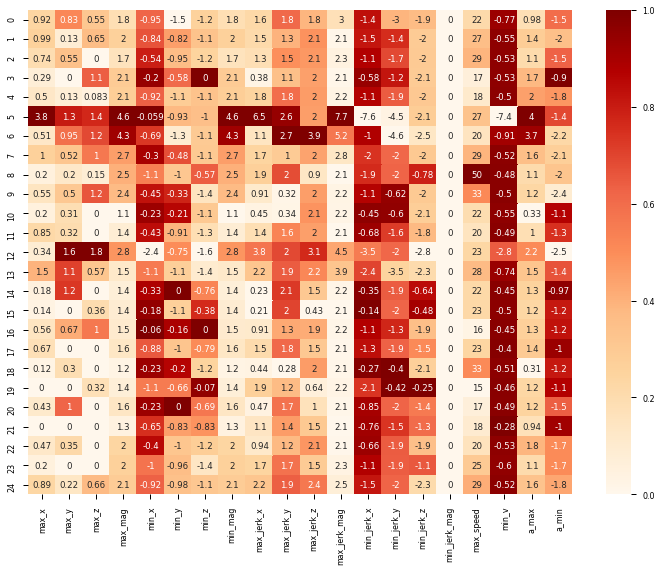

In [6]:
avg_stats_df.columns
sns.set_context("paper", font_scale=0.9)    
plt.figure(figsize=(10,8))
sns.heatmap(avg_stats_df_n, cmap='OrRd', annot=avg_stats_df)
plt.tight_layout()
plt.show()

## To load a single file start here

In [7]:
file=filelist[5]
print(file)
df, stats, avg_stats = ex.df(datadir, file, mask=False)

9EB59633-AD54-47F0-AC5F-61F3A183DB30.csv


## Map
This cell requires mplleaflet.
It will open a map in your browser window. 
skip if you don't wish to install mplleaflet.

In [8]:
#opens a map in a new browser window
ex.leaflet_plot(df)

## Acceleration Plots
These plots show the accelerometer values over the trip time and the speed.
Also shows jerk, change in velocity and differenced values of acceleration. 

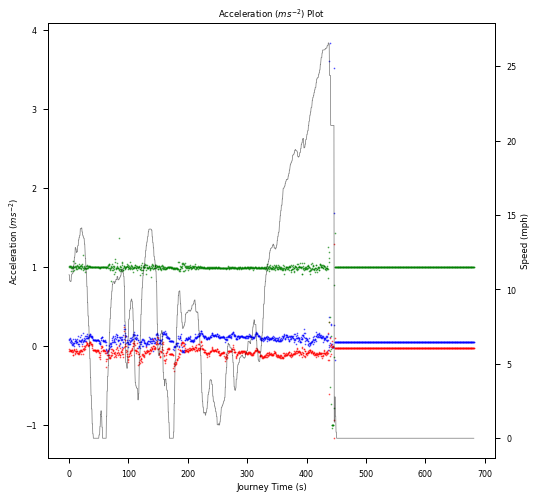

In [9]:
ex.acc_plot(df, columns=['x', 'y', 'z'], title='Acceleration ($m s^{-2}$)')

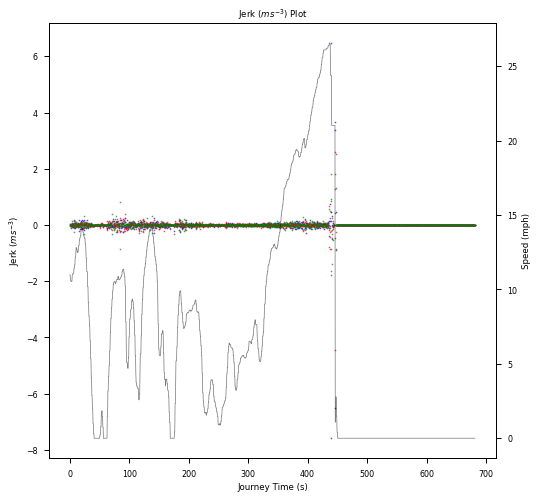

In [10]:
ex.acc_plot(df, columns=['jerk_x', 'jerk_y', 'jerk_z'], title='Jerk ($m s^{-3}$)')

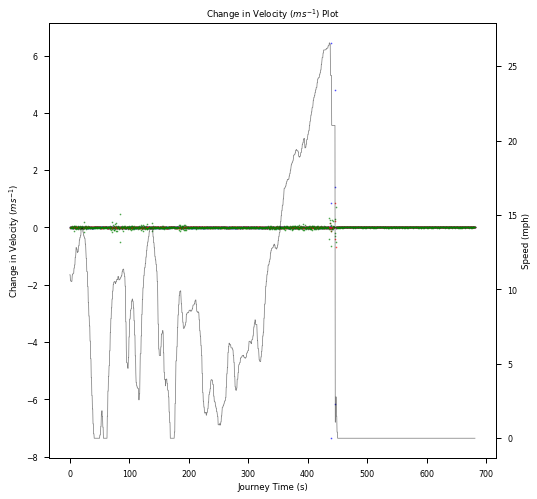

In [11]:
ex.acc_plot(df, columns=['v_x', 'v_y', 'v_z'], title='Change in Velocity ($m s^{-1}$)')

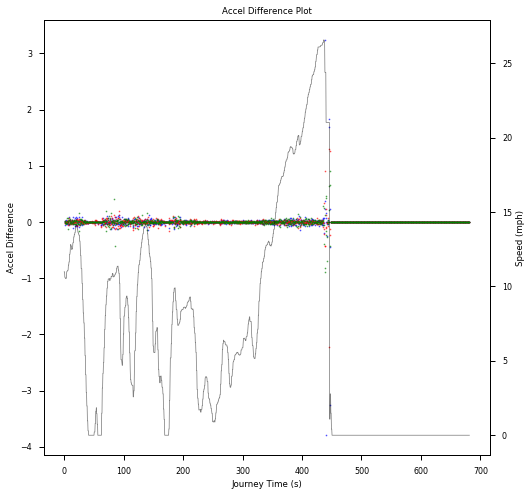

In [12]:
ex.acc_plot(df, columns=['x_diff', 'y_diff', 'z_diff'], title='Accel Difference')

## Cluster Plots
The cluster plots combine xy, xz and yz to get an idea of how the data is distributed.  
Jerk is also plotted and shows the normalisiing effect

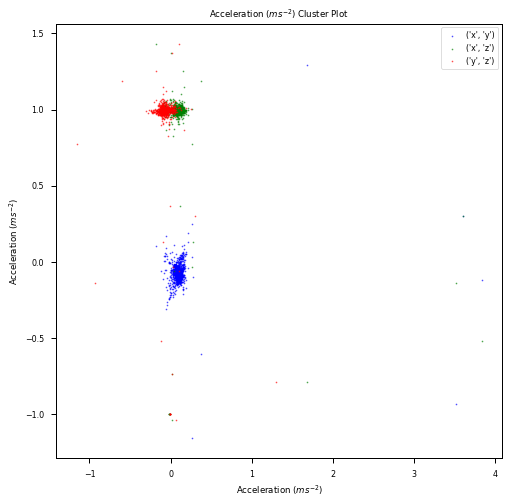

In [13]:
ex.acc_cluster(df, columns=['x', 'y', 'z'], title='Acceleration ($m s^{-2}$)')

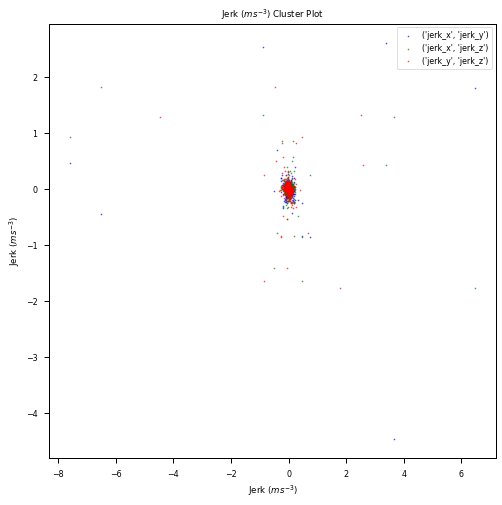

In [14]:
ex.acc_cluster(df, columns=['jerk_x', 'jerk_y', 'jerk_z'], title='Jerk ($m s^{-3}$)')

## DBSCAN
An example of anomaly detection using DBSCAN.  
The cluster is automatically labelled and outliers are in grey. 

Estimated number of clusters: 1
Estimated number of noise points: 8
ClusterNum: 2
                   Datetime      speed       mag  jerk_mag     v_min
877 2015-03-29 16:49:12.500  24.400000  4.577700  6.951659 -0.658781
878 2015-03-29 16:49:13.000  24.400000  3.912370  1.902534 -0.037502
879 2015-03-29 16:49:13.500  24.389999  0.566841  7.654403 -7.352380
883 2015-03-29 16:49:15.500  21.030001  0.742309  1.490910 -0.036055
891 2015-03-29 16:49:19.500  21.030001  2.611945  4.295662 -0.190517
892 2015-03-29 16:49:20.000  21.030001  4.027416  5.922468 -0.404173
893 2015-03-29 16:49:20.500   1.080000  2.365654  6.774797 -6.158912
894 2015-03-29 16:49:21.000   1.080000  1.558456  2.985334 -0.666946


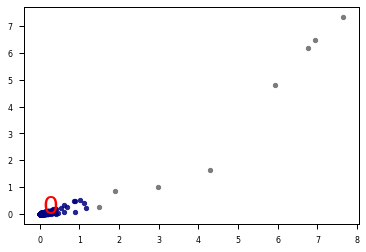

In [15]:
ex.ibm_dbscan(df,'jerk_mag', 'v_mag')

## Autoencoder 
Autoencoder results and threshold plot








Train on 1294 samples, validate on 69 samples
Epoch 1/10





1294/1294 [==============================] - 2s 1ms/step - loss: 0.3166 - val_loss: 0.0294
Epoch 2/10
1294/1294 [==============================] - 0s 134us/step - loss: 0.0934 - val_loss: 0.0043
Epoch 3/10
1294/1294 [==============================] - 0s 135us/step - loss: 0.0821 - val_loss: 0.0040
Epoch 4/10
1294/1294 [==============================] - 0s 139us/step - loss: 0.0764 - val_loss: 0.0047
Epoch 5/10
1294/1294 [==============================] - 0s 135us/step - loss: 0.0675 - val_loss: 5.7816e-04
Epoch 6/10
1294/1294 [==============================] - 0s 131us/step - loss: 0.0578 - val_loss: 7.8275e-04
Epoch 7/10
1294/1294 [==============================] - 0s 132us/step - loss: 0.0483 - val_loss: 9.0889e-05
Epoch 8/10
1294/1294 [==============================] - 0s 134us/step - loss: 0.0401 - val_loss: 3.5849e-04
Epoch 9/10
1294/1294 [==============================] - 0s 131us/step - loss: 0.0326 - val_loss:

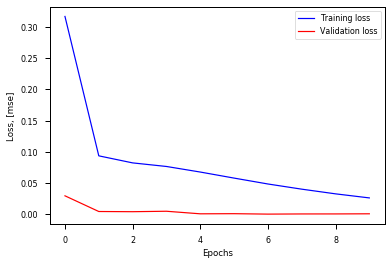

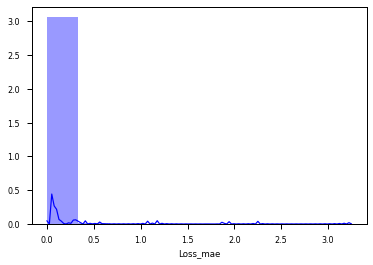

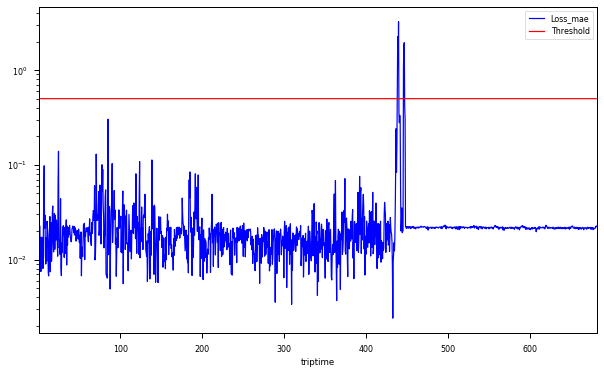

In [16]:
anomaly=ex.simple_autoencoder(df, columns=['mag', 'jerk_mag', 'v_min'])
crash=anomaly[anomaly==True]